In [197]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

# KNN

## Titanic
Vamos a crear un modelo que prediga la probabilidad de supervivencia de los pasajeros

https://www.kaggle.com/c/titanic/data?select=train.csv

0. Importar data de training y testing. Agregarle a la tabla de testing la columna survived proveniente de la tabla gender_submission

In [202]:
resultados = pd.read_csv("titanic/gender_submission.csv")
train_data = pd.read_csv("titanic/train.csv")
test_data = pd.read_csv("titanic/test.csv")

In [204]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [206]:
test_data = test_data.merge(
    resultados, 
    how = "left",
    on='PassengerId'
)

1. Buscar columnas con valores nulos y cantidad de nulos en cada una. Fijarse el porcentaje de los datos nulos que representan sobre el total.

In [209]:
(train_data.isnull().sum() / train_data.shape[0] * 100).round(2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [211]:
(test_data.isnull().sum() / test_data.shape[0] * 100).round(2)

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
Survived        0.00
dtype: float64

2. En base al resultado anterior. ¿Cúales columnas consideran que tienen sentido completar y cuales se deberían eliminar? Eliminar la que corresponda de la tabla de test y de train.

In [214]:
train_data.drop("Cabin", axis = "columns", inplace = True)

In [216]:
test_data.drop("Cabin", axis = "columns", inplace = True)

3. Completar valores nulos con el criterio que considres correcto en cada una de las columnas (que tengan sentido completar). Esto debe hacerse tanto en la tabla de training como la de testing (con el mismo criterio en ambas).

   Verificar como se distribuyen los valores de cada columna con un gráfico previamente para tener más herramientas en la decisión

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

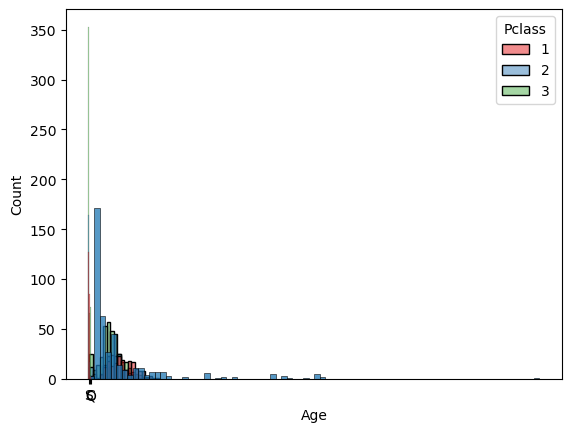

In [219]:
sns.histplot(
    data = train_data,
    x = "Age",
    hue = "Pclass",
    palette="Set1"
)

mediana_edad = test_data.groupby(['Pclass', 'Sex'])['Age'].median()
mediana_edad

M1 = (test_data.Sex == "male") & (test_data.Pclass == 1)
F1 = (test_data.Sex == "female") & (test_data.Pclass == 1)
M2 = (test_data.Sex == "male") & (test_data.Pclass == 2)
F2 = (test_data.Sex == "female") & (test_data.Pclass == 2)
M3 = (test_data.Sex == "male") & (test_data.Pclass == 3)
F3 = (test_data.Sex == "female") & (test_data.Pclass == 3)

test_data.loc[M1, "Age"] = test_data.loc[M1,"Age"].fillna(mediana_edad.iloc[1])
test_data.loc[F1, "Age"] = test_data.loc[F1,"Age"].fillna(mediana_edad.iloc[0])
test_data.loc[M2, "Age"] = test_data.loc[M2,"Age"].fillna(mediana_edad.iloc[3])
test_data.loc[F2, "Age"] = test_data.loc[F2,"Age"].fillna(mediana_edad.iloc[2])
test_data.loc[M3, "Age"] = test_data.loc[M3,"Age"].fillna(mediana_edad.iloc[5])
test_data.loc[F3, "Age"] = test_data.loc[F3,"Age"].fillna(mediana_edad.iloc[4])

test_data.Age.isnull().sum()

mediana_training = train_data.groupby(['Pclass', 'Sex'])['Age'].median()
mediana_training

TM1 = (train_data.Sex == "male") & (train_data.Pclass == 1)
TF1 = (train_data.Sex == "female") & (train_data.Pclass == 1)
TM2 = (train_data.Sex == "male") & (train_data.Pclass == 2)
TF2 = (train_data.Sex == "female") & (train_data.Pclass == 2)
TM3 = (train_data.Sex == "male") & (train_data.Pclass == 3)
TF3 = (train_data.Sex == "female") & (train_data.Pclass == 3)

train_data.loc[TM1, "Age"] = train_data.loc[TM1,"Age"].fillna(mediana_training.iloc[1])
train_data.loc[TF1, "Age"] = train_data.loc[TF1,"Age"].fillna(mediana_training.iloc[0])
train_data.loc[TM2, "Age"] = train_data.loc[TM2,"Age"].fillna(mediana_training.iloc[3])
train_data.loc[TF2, "Age"] = train_data.loc[TF2,"Age"].fillna(mediana_training.iloc[2])
train_data.loc[TM3, "Age"] = train_data.loc[TM3,"Age"].fillna(mediana_training.iloc[5])
train_data.loc[TF3, "Age"] = train_data.loc[TF3,"Age"].fillna(mediana_training.iloc[4])

train_data.Age.isnull().sum()

sns.histplot(
    data = test_data,
    x = "Fare",
    #hue = "Pclass",
    #palette="Set1"
)

test_data.Fare.isnull().sum()

test_data.fillna(value = test_data.Fare.median(), inplace = True)

sns.histplot(
    data = train_data,
    x = "Embarked",
    hue = "Pclass",
    palette="Set1"
)

train_data.Embarked.isnull().sum()

train_data.Embarked.mode()

train_data["Embarked"].fillna(
    value = train_data.Embarked.mode()[0],
    inplace= True
)

test_data.isnull().sum()

train_data.isnull().sum()

4. Realizar análisis exploratorio. Graficar las personas que sobrevivieron por:
    - Clase (Pclass)
    - Sexo (Sex)
    - Costo de boleto (Fare)

5. Verificar columnas del DataFrame e identificar sobre cuales se deberían generar variables dummies.
   Generar columnas de dummies sobre "Pclass","Embarked" y "Sex". Aplicar cambios en training y testing

In [226]:
test_data = pd.get_dummies(
    test_data, 
    columns = ["Pclass", "Embarked", "Sex"],
    drop_first=True
)
train_data = pd.get_dummies(
    train_data, 
    columns = ["Pclass", "Embarked", "Sex"],
    drop_first=True
)

In [228]:
test_data.columns

Index(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Survived', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S',
       'Sex_male'],
      dtype='object')

In [230]:
train_data.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')

6. Eliminar columnas del dataset que considere que no suman al modelo. Hacerlo en testing y training

In [233]:
test_data.drop(["PassengerId", "Name", "Ticket"], axis = "columns", inplace = True)

In [235]:
train_data.drop(["PassengerId", "Name", "Ticket"], axis = "columns", inplace = True)

In [237]:
train_data.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3',
       'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')

In [239]:
test_data.head()

,Age,SibSp,Parch,Fare,Survived,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,34.5,0,0,7.8292,0,False,True,True,False,True
1,47.0,1,0,7.0000,1,False,True,False,True,False
2,62.0,0,0,9.6875,0,True,False,True,False,True
3,27.0,0,0,8.6625,0,False,True,False,True,True
4,22.0,1,1,12.2875,1,False,True,False,True,False


In [241]:
train_data.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,1,0,7.2500,False,True,False,True,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,True,False,True,False
3,1,35.0,1,0,53.1000,False,False,False,True,False
4,0,35.0,0,0,8.0500,False,True,False,True,True


In [243]:
test_data.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Survived', 'Pclass_2', 'Pclass_3',
       'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')

7. Agregar una columna llamada "IsMinor" que sea 1 en caso de tener 16 años o menos y 0 en caso contrario. Hacerlo para testing y training

In [246]:
train_data["IsMinor"] = np.where(train_data["Age"] <= 16, 1, 0)
test_data["IsMinor"] = np.where(test_data["Age"] <= 16, 1, 0)

8. Ajustar modelo considerando todas las variables del dataset de training.

In [249]:
X_train = train_data.loc[:, train_data.columns != "Survived"]
y_train = train_data.loc[:, "Survived"]

In [251]:
X_train.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,22.0,1,0,7.2500,False,True,False,True,True,0
1,38.0,1,0,71.2833,False,False,False,False,False,0
2,26.0,0,0,7.9250,False,True,False,True,False,0
3,35.0,1,0,53.1000,False,False,False,True,False,0
4,35.0,0,0,8.0500,False,True,False,True,True,0


In [253]:
X_test = test_data.loc[:, test_data.columns != "Survived"]
y_test = test_data.loc[:, "Survived"]

In [255]:
k = 5
modelo = neighbors.KNeighborsClassifier(n_neighbors = k) # crear
modelo.fit(X_train, y_train) #ajustado 

KNeighborsClassifier()

9. Validar el modelo con datos de testing, agregar columna con cluster a test_data

In [258]:
y_pred = modelo.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [260]:
X_test["cluster_pred"] = y_pred

In [262]:
X_test.head(2)

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,IsMinor,cluster_pred
0,34.5,0,0,7.8292,False,True,True,False,True,0,0
1,47.0,1,0,7.0000,False,True,False,True,False,0,0



10. Calcular matriz de confusión

In [265]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [267]:
tabla = pd.DataFrame(
    {
        "real": y_test, 
        "pred": y_pred
    }
)
tabla.head()
tabla.groupby(["real", "pred"]).size().reset_index()

,real,pred,0
0,0,0,191
1,0,1,75
2,1,0,70
3,1,1,82


In [269]:
matriz_confusion = confusion_matrix(y_test, y_pred)
matriz_confusion

array([[191,  75],
       [ 70,  82]])

In [271]:
TN = matriz_confusion[0,0]
FP = matriz_confusion[0,1]
FN = matriz_confusion[1,0]
TP = matriz_confusion[1,1]

11. Calcular Accuracy

In [274]:
(TN + TP) / (TN + TP +FN + FP)

0.65311004784689

12. Calcular sensibilidad

In [277]:
TP / (TP + FN)

0.5394736842105263

13. Calcular especificidad

In [280]:
TN / (TN + FP)

0.7180451127819549